### Problem 7: Quantum Nearest Neighbour(QNN)
Quantum Nearest Neighbor is a foundational algorithm in Quantum AI for quantum classification. It leverages the distance or similarity between quantum states to classify data points, which is analogous to the classical k-Nearest Neighbor algorithm.

**TASK :**

You will implement a basic QNN algorithm to compare quantum states and classify a new data point based on its similarity to a set of labeled quantum states.

**Scenario :**
1. Training States:
    - ∣q1⟩ : Label 0, corresponds to the data point x1=0.2
    - ∣q2⟩ : Label 1, corresponds to data point x2=0.8
2. Test State:
    - A new data point x_test=0.5

The goal is to classify x_test by determining which training state it is "closer" to using the SWAP test.

---

**APPROACH :**

The SWAP test is a quantum algorithm to compute the overlap (similarity) between two quantum states. Here's how it works:

1. Prepare two quantum states: the test state and a training state.
2. Add an ancilla qubit in the ∣+⟩ state.
3. Apply a controlled SWAP gate between the test state and the training state.
4. Measure the `ancilla` qubit. The measurement outcome gives the overlap.

**STEPS :**
1. Encode x1,x2,x_test using angle encoding.
2. Implement the SWAP test to compute overlaps.
3. Classify x_test based on the highest similarity.




In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.compiler import transpile
# from qiskit.visualization import plot_bloch_multivector
import numpy as np

In [2]:
# Function for Angle Encoding
def angle_encoding(x):
    qc = QuantumCircuit(1)
    qc.ry(2 * x, 0)  # Rotate the qubit by 2x radians on Y-axis
    return qc

#### What is Ancilla in qubits ?

- Imagine you're building a complex machine.
- You need some extra parts to help you assemble the main parts.
- These extra parts aren't part of the final machine, but they're crucial for the building process.

In quantum computing, these extra parts are called ancilla qubits.
They're like helper qubits that assist in performing quantum operations on the main qubits.
They might help create specific quantum states, implement certain quantum gates, or even correct errors.

Here are some key points about ancilla qubits:

* **Temporary:** They're not part of the final quantum state or the output of a quantum computation.
* **Versatile:** They can be used in various ways, depending on the specific quantum algorithm or operation.
* **Essential:** They often play a crucial role in enabling complex quantum computations.

Think of them as the behind-the-scenes workers of the quantum world, making the magic happen!

Read more about Ancilla qubits here - https://en.wikipedia.org/wiki/Ancilla_bit


In [3]:
# SWAP Test Implementation
def swap_test(test_state, train_state):
    qc = QuantumCircuit(3, 1)  # 3 qubits: 1 ancilla, 2 for states
    ancilla, q1, q2 = 0, 1, 2
    
    # Prepare ancilla in |+> state
    qc.h(ancilla)
    
    # Encode the test and training states
    qc.compose(test_state, qubits=[q1], inplace=True)
    qc.compose(train_state, qubits=[q2], inplace=True)
    
    # Apply controlled SWAP gate
    qc.cswap(ancilla, q1, q2)
    
    # Measure the ancilla
    qc.h(ancilla)
    qc.measure(ancilla, 0)
    return qc

In [4]:
# Simulate the SWAP test
def simulate_swap_test(test_state, train_state):
    qc = swap_test(test_state, train_state)
    simulator = Aer.get_backend('qasm_simulator')
    result = (simulator.run(transpile(qc, simulator))).result()
    counts = result.get_counts()
    prob_0 = counts.get('0', 0) / 1024  # Probability of ancilla being 0
    overlap = 2 * prob_0 - 1  # Calculate overlap from probability
    return overlap

In [5]:
# Prepare states
x1, x2, x_test = 0.2, 0.8, 0.5
train_state_1 = angle_encoding(x1)
train_state_2 = angle_encoding(x2)
test_state = angle_encoding(x_test)

In [6]:
# Compute overlaps
overlap_1 = simulate_swap_test(test_state, train_state_1)
overlap_2 = simulate_swap_test(test_state, train_state_2)

In [7]:
# Classification based on maximum overlap
if overlap_1 > overlap_2:
    classification = "Class 0"
else:
    classification = "Class 1"

In [8]:
# Print results
print(f"Overlap with Class 0 (x1 = {x1}): {overlap_1}")
print(f"Overlap with Class 1 (x2 = {x2}): {overlap_2}")
print(f"Test state x_test = {x_test} is classified as: {classification}")

Overlap with Class 0 (x1 = 0.2): 0.931640625
Overlap with Class 1 (x2 = 0.8): 0.91796875
Test state x_test = 0.5 is classified as: Class 0


Since the SWAP test estimates the overlap between 2 quantum states, so -
- Higher overlap closer to 1 indicates greater similarity and corresponds to lower quantum "distance" between states.
- Lower overlap closer to 0 indicates less similarity.
- The classification aligns with the training state that is closer to the test point in the encoded quantum space.

So x_test indicates that it is slightly closer to x1=0.2(91.796875%) and x2=0.8(90.625%)


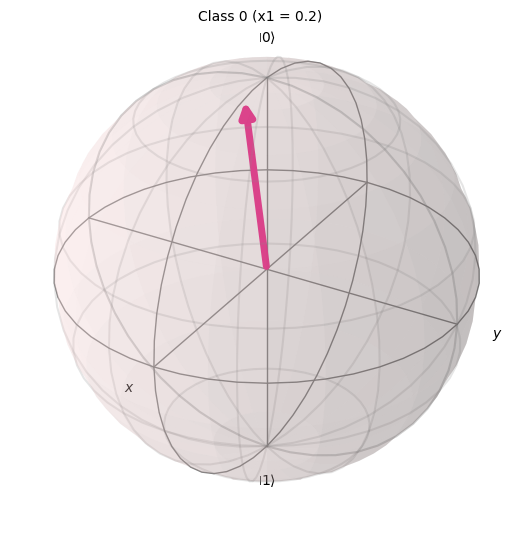

In [9]:
from qiskit.visualization import plot_bloch_vector
from math import cos, sin

# Define the states
def get_bloch_coords(angle_rad):
    """Convert an angle to Bloch sphere coordinates."""
    x = sin(angle_rad)  # sin(theta) component for |1>
    z = cos(angle_rad)  # cos(theta) component for |0>
    return [x, 0, z]  # y is 0 as the states lie in the X-Z plane

# Angles in radians
angle_x1 = 0.2  # Class 0
angle_x2 = 0.8  # Class 1
angle_xtest = 0.5  # Test state

# Bloch vectors
bloch_x1 = get_bloch_coords(angle_x1)
bloch_x2 = get_bloch_coords(angle_x2)
bloch_xtest = get_bloch_coords(angle_xtest)

# Plot the Bloch vectors
fig_x1 = plot_bloch_vector(bloch_x1, title="Class 0 (x1 = 0.2)")
fig_x2 = plot_bloch_vector(bloch_x2, title="Class 1 (x2 = 0.8)")
fig_xtest = plot_bloch_vector(bloch_xtest, title="Test State (x_test = 0.5)")

fig_x1


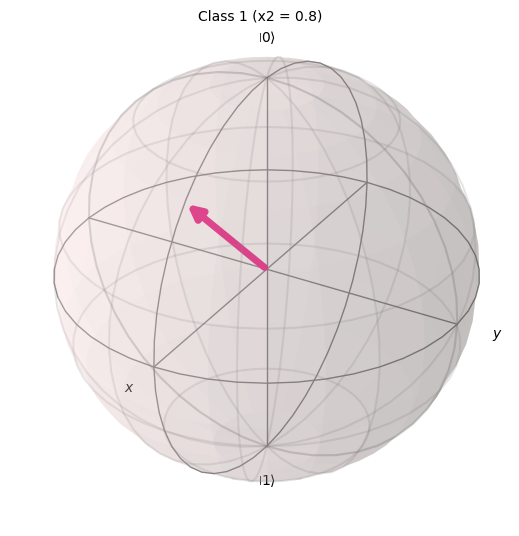

In [10]:
fig_x2

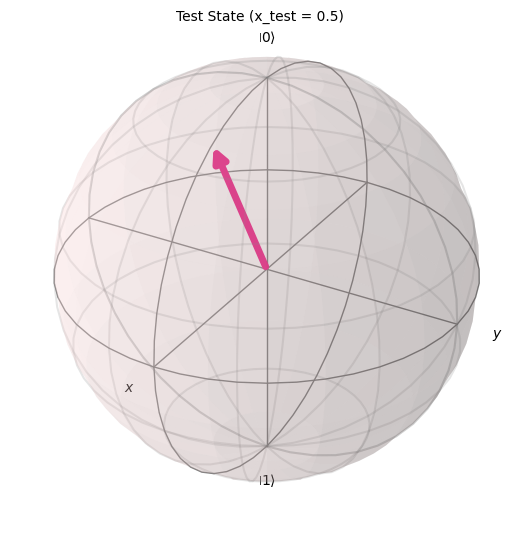

In [11]:
fig_xtest

#### TASK :
Introduce noise to this system and check how it deviates from the ideal predicted values.